<a href="https://colab.research.google.com/github/smritisrikanth/Machine-Learning/blob/main/HW2/hw2_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 475: Machine Learning, Fall 2022**
# **Homework 2, Lab (15 points)**

**Instructions:**
This notebook is intended to guide you through a classification task using SVMs. Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). There are 3 questions. For each question, you are expected to write code to train SVM models, plot figures using the plot helper function (plot_svm_kernel), and then interprete the figures. 

<!-- The objective of this notebook is to provide a brief introduction to support vector machines (SVMs) and explore their advantages and disadvantages in classification and regression problems. -->

In [ ]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 119 kB 5.0 MB/s 
     |████████████████████████████████| 76 kB 2.4 MB/s 
  Created wheel for openml: filename=openml-0.12.2-py3-none-any.whl size=137326 sha256=5834f0f7df5e42a3f35bc1b24ad91ff0dc494e3c004bd7fa3ccb9200580523b8
  Stored in directory: /root/.cache/pip/wheels/6a/20/88/cf4ac86aa18e2cd647ed16ebe274a5dacee9d0075fa02af250
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=bb83d1db0abd778a0a59fae52e565eadba4bb426572bb0c2c251b3065113c149
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff


#Getting the data

We are using the sklearn.datasets.make_moons for building a dataset for the svm. And, have a quick look at the data.

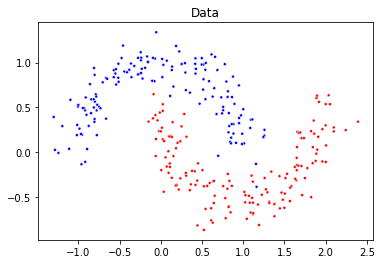

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.15, random_state=0, n_samples=300)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr, edgecolors='k', marker='.').set_title("Data")
plt.show()

In [ ]:
# Plotting helpers. Please read following function carefully, since you will use this funcion for plotting the later results

#     Visualizes the SVM model given the various outputs. It plots:
#    * All the data point, color coded by class: blue or red
#    * The support vectors, indicated by circling the points with a black border. 
#      If the dual coefficients are known (only for kernel SVMs) if paints support vectors with high coefficients darker
#    * The decision function as a blue-to-red gradient. It is white where the decision function is near 0.
#    * The decision boundary as a full line, and the SVM margins (-1 and +1 values) as a dashed line
#
#
def plot_svm_kernel(X, y, title, support_vectors, decision_function, dual_coef=None, show=True):
    """
    Attributes:
    X -- The training data
    y -- The correct labels
    title -- The plot title
    support_vectors -- the list of the coordinates of the support vectores
    decision_function - The decision function returned by the SVM
    dual_coef -- The dual coefficients of all the support vectors (not relevant for LinearSVM)
    show -- whether to plot the figure already or not
    """
    # plot the line, the points, and the nearest vectors to the plane
    #plt.figure(fignum, figsize=(5, 5))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr, marker='.')
    if dual_coef is not None:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c=dual_coef[0, :],
                    s=70, edgecolors='k', zorder=10, marker='.', cmap=plt.cm.bwr)
    else:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none',
                    s=70, edgecolors='k', zorder=10, marker='.', cmap=plt.cm.bwr)
    plt.axis('tight')
    x_min, x_max = -1.5, 2.5
    y_min, y_max = -1.0, 1.5

    XX, YY = np.mgrid[x_min:x_max:300j, y_min:y_max:300j]
    Z = decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
    plt.pcolormesh(XX, YY, Z, vmin=-1, vmax=1, cmap=plt.cm.bwr, alpha=0.1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())

    if show:
        plt.show()

#**Question 1: Linear SVMs (3 points)**

In this question, you should train a LinearSVC using default loss and C=0.001. Then, use the plotting fucntion provided above to plot your results. 

Using the given function, the plot should show the predictions for the linear SVM. The background color should show the prediction (blue or red). The full line should show the decision boundary, and the dashed line the margin. The encircled points should show the support vectors.


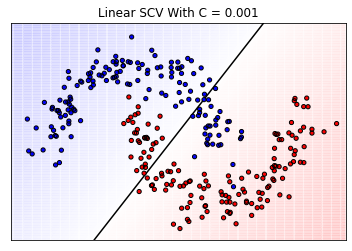

In [ ]:
#TODO: write code to meet aforementioned question requirements

#Hint: you could use class sklearn.SVC from sklearn library for the code.
#You can use the "support_vectors_" and "decision_function" in the sklearn.SVC object

from sklearn.svm import SVC

svc = SVC(kernel = 'linear', C = 0.001).fit(X, y)

plot_svm_kernel(X, y, 'Linear SCV With C = 0.001', svc.support_vectors_, svc.decision_function)


#TODO: Put your plots here: 



#TODO: write your interpretation here (hint: does the model fit the data well? how about the support vectors?)

----------------------------------
The model does not fit the data very well, as there are several misclassified data points. In addition, there are a lot of support vectors and they are not closely clustered near the linear classifier; rather, they are spread out all over the dataset, which is not ideal.
----------------------------------


#**Question 2: SVMs with different kernels （5 points）**

#TODO 
Train a SVM with three different kernels (linear, polynomial and RBF) and C = 1.0. Especially for RBF kernel, kernel coefficient value (gamma) is set to 2.0. Plot the results for each kernel with “plot_svm_kernel” function (3 figures expected). 

Using the given function, the plots should show the predictions made for the different kernels. The background color should show the prediction (blue or red). The full line should show the decision boundary, and the dashed line the margin. The encircled points should show the support vectors.

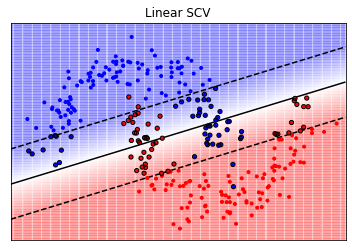

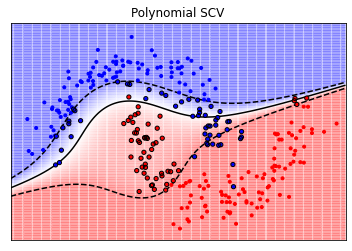

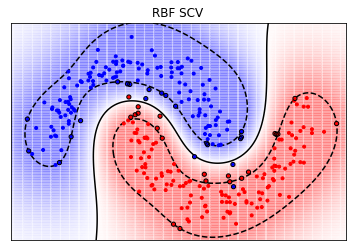

In [ ]:
#TODO: write code to meet aforementioned question requirements

#Hint: you could use class sklearn.svm from sklearn library

svm_linear = SVC(kernel = 'linear').fit(X, y)
svm_poly = SVC(kernel = 'poly').fit(X, y)
svm_rbf = SVC(kernel = 'rbf', gamma = 2.0).fit(X, y)

plot_svm_kernel(X, y, 'Linear SCV', svm_linear.support_vectors_, svm_linear.decision_function)
plot_svm_kernel(X, y, 'Polynomial SCV', svm_poly.support_vectors_, svm_poly.decision_function)
plot_svm_kernel(X, y, 'RBF SCV', svm_rbf.support_vectors_, svm_rbf.decision_function)

#TODO: Put your plots here 

#TODO: write your interpretation here (hint: does the model fit the data well? how about the support vectors?)

Linear: the model fits the data relatively well, with the majority of data points being classified correctly and most of the support vectors being within a relatively small margin of the classifier.

Polynomial: the mdoel fits the data well - again, almost all the support vectors are within a small geometric margin, and only a handful of points (all support vectors) are misclassified.

RBF: the model first the data extremely well. There are very few support vectors, most of which fall on the edge of the margin farthest from the classifier. There are only a couple of misclassified points.

#**Question 3: Visualizing the RBF models and hyperparameter space（7 points）**

#TODO
Try 3 very different values for C and gamma (for both values, using [1e-3,1,1e3] in this lab). For each of the 9 combinations, create the same RBF plot as before to understand what the model is doing. In particualr, first create a standard train-test split, train the model using the training data, report the train and test accuracy, and then create the RBF plot using the training data. Explain the performance results. When are you over/underfitting? Can you see this in the train and test accuracy?

Train Accuracy =  0.5377777777777778
Test Accuracy =  0.38666666666666666


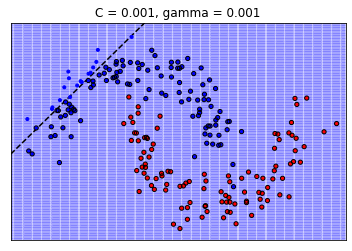

Train Accuracy =  0.5377777777777778
Test Accuracy =  0.38666666666666666


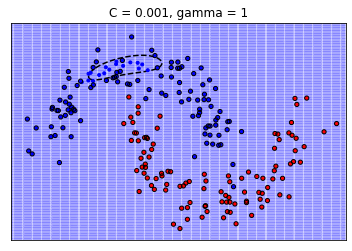

Train Accuracy =  0.5377777777777778
Test Accuracy =  0.38666666666666666


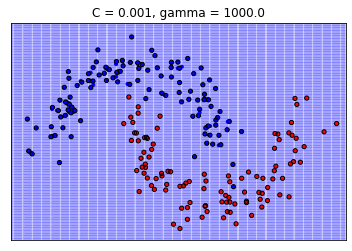

Train Accuracy =  0.5377777777777778
Test Accuracy =  0.38666666666666666


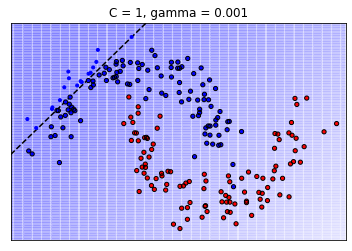

Train Accuracy =  0.9777777777777777
Test Accuracy =  1.0


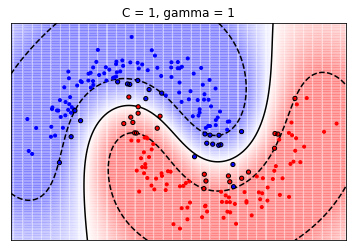

Train Accuracy =  1.0
Test Accuracy =  0.68


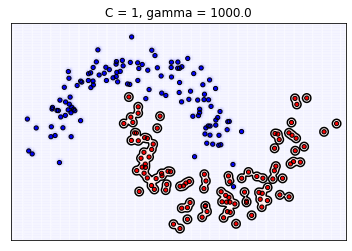

Train Accuracy =  0.8622222222222222
Test Accuracy =  0.84


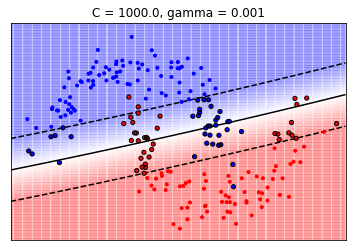

Train Accuracy =  0.9955555555555555
Test Accuracy =  1.0


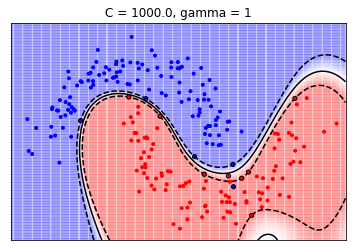

Train Accuracy =  1.0
Test Accuracy =  0.6933333333333334


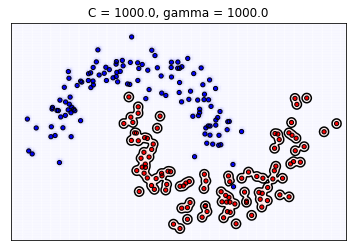

In [ ]:
#TODO: write code here to meet abovementioned question requirements 

#Hints: you could use class sklearn.model_selection from sklearn.library for build a standard stratified train-test split
import math
from sklearn.model_selection import train_test_split

values = [math.pow(10,-3), 1, math.pow(10,3)]

for c in values:
  for g in values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    svm_rbf = SVC(kernel = 'rbf', C = c, gamma = g).fit(X_train, y_train)
    y_pred_train = svm_rbf.predict(X_train)
    y_pred_test = svm_rbf.predict(X_test)
    print('Train Accuracy = ', np.count_nonzero(y_pred_train == y_train)/y_train.size)
    print('Test Accuracy = ', np.count_nonzero(y_pred_test == y_test)/y_test.size)
    plot_svm_kernel(X_train, y_train, 'C = ' + str(c) + ', gamma = ' + str(g), svm_rbf.support_vectors_, svm_rbf.decision_function)

#TODO: Put your plots here

#TODO: write your interpretation here (see examples below, refer to your plots when explaining what the model is doing)

For large C, the model underfits less than for low values of C. For large gamma, the model overfits, resulting in high train accuracy and very low test accuracy. Increasing C and decreasing gamma in general improves test accuracy. The best performing parameters are C = 1000 and gamma = 1, where the train accuracy is 0.995 and the test accuracy is 1.0. The model correctly classifies almost every data point, and there are very few support vectors, the majority of which lie closer to the edge of the margin than the classifier.


